# Feature Matching

국민대학교 차량지능특론 SLAM 파트 과제 2

- 학번 : M2020527
- 이름 : 김용환

---

OpenCV를 사용하여 feature description을 얻어내고, 이를 이용해 feature matching을 진행한다.

- 지난 시간에 얻은 ORB feature, SIFT feature 등에 대한 description을 얻어낸다.
- 이를 이용해 두 이미지 간의 feature matching을 진행한다.


**참고**

- [OpenCV tutorial - Feature Detection and Description](https://docs.opencv.org/master/db/d27/tutorial_py_table_of_contents_feature2d.html)
- [OpenCV document](https://docs.opencv.org/3.4/d0/d13/classcv_1_1Feature2D.html#a8be0d1c20b08eb867184b8d74c15a677)
- Colab에서 코드에 이상이 없음에도 불구하고 결과가 제대로 나오지 않을 경우, '런타임 다시 시작...'을 해보도록 한다.

---

**[중요] 과제 제출 방법**
- 과제 제출 기한은 2021년 6월 14일까지입니다.
- 과제는 Colab에서 작성한 것을 다운받아 (파일-.ipynb 다운로드) 가상 대학에 업로드합니다. (이외의 제출 방법은 인정하지 않음)
- 제출 시 파일 제목은 '학번_이름' 으로 저장합니다.

# OpenCV 버전 변경

SIFT, SURF Feature 사용을 위해 현재 Colab 서버에 설치되어 있는 OpenCV 버전을 변경한다.

In [1]:
!pip3 uninstall opencv-python
!pip3 install -U opencv-contrib-python==3.4.2.17

Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 141kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv.__version__)

python 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
numpy 1.19.5
opencv 3.4.2


In [67]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
ROOT = '/content/drive/My Drive/Colab Notebooks/Vehicle Intelligence/work1/'

### opencv를 사용해 이미지 불러오기

- `cv.imread()`를 이용해 이미지를 불러오면 RGB가 아닌 BGR 이미지임을 유의해야 한다.

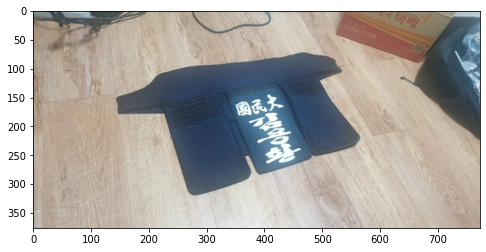

In [87]:

img1 = cv.imread(ROOT + 'feature/tare1.JPG')
img2 = cv.imread(ROOT + 'feature/tare2.JPG')
plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
#plt.show()

## Brute-Force Matching

brute-force matcher를 사용해 feature matching을 진행한다.

### feature matching을 진행할 두 이미지 불러오기

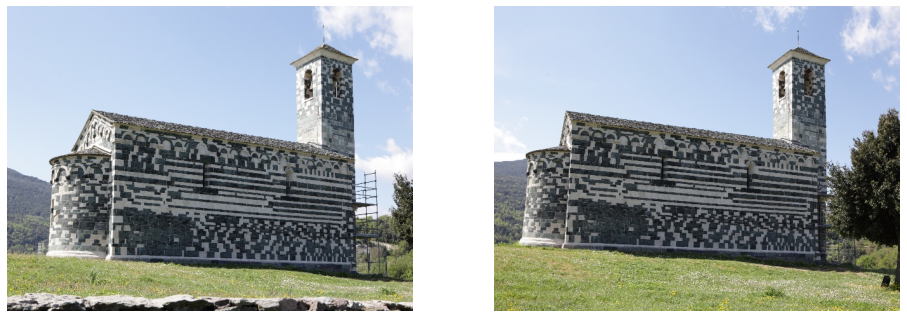

In [6]:
img1 = cv.imread(ROOT + 'feature/DPP_0010.JPG')
img2 = cv.imread(ROOT + 'feature/DPP_0011.JPG')

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(img1[:,:,::-1])
plt.axis('off')
plt.subplot(122)
plt.imshow(img2[:,:,::-1])
plt.axis('off')
plt.show()

### ORB feature 얻기

지난 과제를 통해 실습한 ORB feature를 구한다.

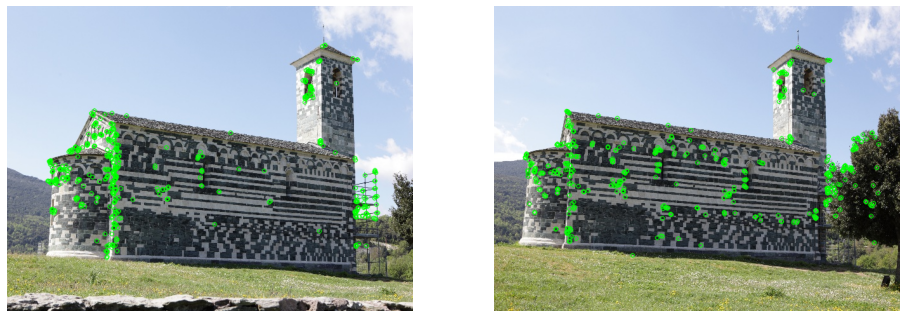

In [12]:
img1 = cv.imread(ROOT + 'feature/DPP_0010.JPG')
img2 = cv.imread(ROOT + 'feature/DPP_0011.JPG')

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# To-do : 각 이미지에 대해 orb feature를 얻고 시각화하기
# ORB 검출기 시작
orb1 = cv.ORB_create ()
# ORB로 키포인트 찾기
kp1 = orb1.detect (img1, None )
# ORB로 설명자를 계산
kp1, des1 = orb1.compute (img1, kp1)
# 크기와 방향이 아닌 키포인트 위치 만 그립니다.
orb_kps_img1 = cv.drawKeypoints (img1, kp1, None , color = (0,255,0), flags = 0)
##
orb2 = cv.ORB_create ()
# ORB로 키포인트 찾기
kp2 = orb2.detect (img2, None )
# ORB로 설명자를 계산
kp2, des2 = orb.compute (img2, kp2)
# 크기와 방향이 아닌 키포인트 위치 만 그립니다.
orb_kps_img2 = cv.drawKeypoints (img2, kp2, None , color = (0,255,0), flags = 0)

#plt.imshow (img2), plt.show ()
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(orb_kps_img1[:,:,::-1])
plt.axis('off')
plt.subplot(122)
plt.imshow(orb_kps_img2[:,:,::-1])
plt.axis('off')
plt.show()

### ORB descriptor 구하기

**과제** 
- 찾은 feature에 대해 descriptor를 구한다.

관련 함수

- `	keypoints, descriptors	=	cv.Feature2D.compute(	image, keypoints[, descriptors]	)`
- `keypoints, descriptors	=	cv.Feature2D.detectAndCompute(	image, mask[, descriptors[, useProvidedKeypoints]]	)`

In [ ]:
# To-do
# ORB로 키포인트 찾기
kp1 = orb1.detect (img1, None )
# ORB로 설명자를 계산
kp1, des1 = orb1.compute (img1, kp1)
orb2 = cv.ORB_create ()
# ORB로 키포인트 찾기
kp2 = orb2.detect (img2, None )
# ORB로 설명자를 계산
kp2, des2 = orb.compute (img2, kp2)

### Brute-Force Matching

**과제** 
- feature matching을 진행하고 시각화한다.
- matcher에 cycle consistency를 추가하여 두 이미지를 비교한다.

관련 함수

`	<BFMatcher object>	=	cv.BFMatcher(	[, normType[, crossCheck]]	)
`


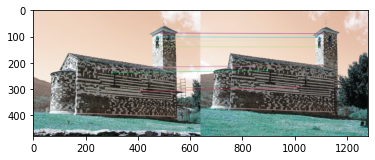

(<matplotlib.image.AxesImage at 0x7efd823ae790>, None)

In [14]:
# To-do
# BFMatcher 객체 생성
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

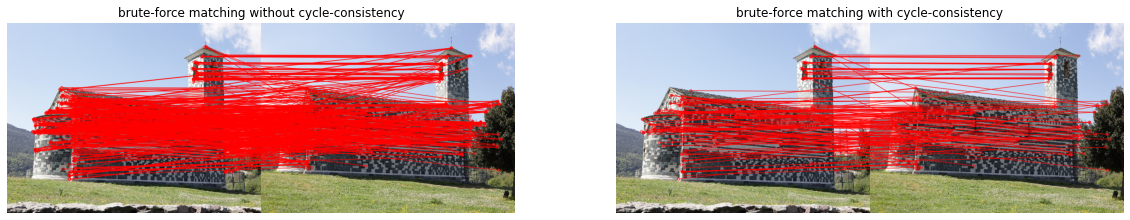

In [ ]:
# 결과 이미지 예시

### SIFT feature 얻기

이번 단계에서는 SIFT feature에 대해 매칭을 진행한다.

지난 과제를 통해 실습한 SIFT feature를 구한다.

In [26]:
from google.colab.patches import cv2_imshow

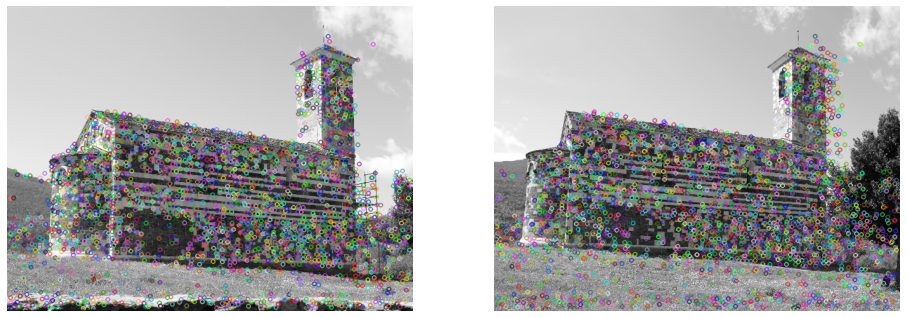

In [33]:
img1 = cv.imread(ROOT + 'feature/DPP_0010.JPG')
img2 = cv.imread(ROOT + 'feature/DPP_0011.JPG')

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

sift1 = cv.xfeatures2d.SIFT_create()

kp1 = sift1.detect(gray1,None)
img1=cv.drawKeypoints(gray1,kp1,img1)
cv.imwrite('sift_keypoints1.jpg',img1)

gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

sift2 = cv.xfeatures2d.SIFT_create()

kp2 = sift2.detect(gray1,None)
img2=cv.drawKeypoints(gray2,kp2,img2)
cv.imwrite('sift_keypoints2.jpg',img1)

#cv2_imshow(img1)

# To-do : 각 이미지에 대해 SIFT feature를 얻고 시각화하기
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(img1[:,:,::-1])
plt.axis('off')
plt.subplot(122)
plt.imshow(img2[:,:,::-1])
plt.axis('off')
plt.show()

### SIFT descriptor 구하기

**과제** 
- 찾은 feature에 대해 descriptor를 구한다.

관련 함수

- `	keypoints, descriptors	=	cv.Feature2D.compute(	image, keypoints[, descriptors]	)`
- `keypoints, descriptors	=	cv.Feature2D.detectAndCompute(	image, mask[, descriptors[, useProvidedKeypoints]]	)`

In [23]:
from google.colab.patches import cv2_imshow

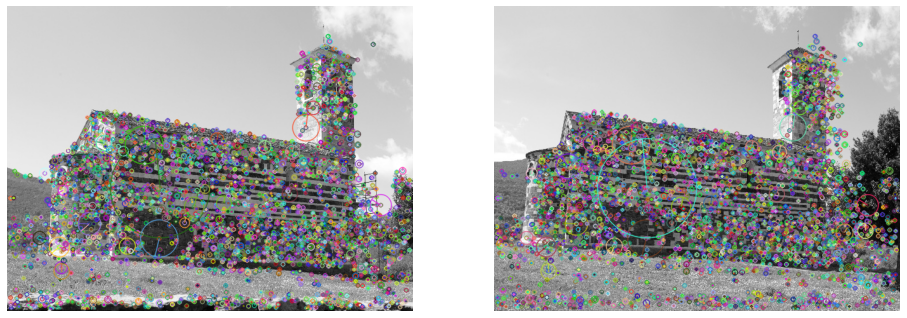

In [55]:
# To-do

kp1 = sift1.detect(gray1,None)
keypoints1, descriptor1 = sift1.detectAndCompute(gray1, None)

img_draw1 = cv.drawKeypoints(img1, kp1, None, 
                flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
kp2 = sift2.detect(gray1,None)
keypoints2, descriptor2 = sift2.detectAndCompute(gray1, None)

img_draw2 = cv.drawKeypoints(img2, kp2, None, 
                flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(img_draw1[:,:,::-1])
plt.axis('off')
plt.subplot(122)
plt.imshow(img_draw2[:,:,::-1])
plt.axis('off')
plt.show()
#cv2_imshow(img1)

### Brute-Force Matching

**과제** 
- feature matching을 진행하고 시각화한다.
- matcher에 cycle consistency를 추가하여 두 이미지를 비교한다.

관련 함수

`	<BFMatcher object>	=	cv.BFMatcher(	[, normType[, crossCheck]]	)
`


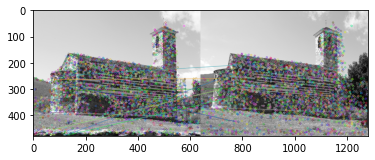

(<matplotlib.image.AxesImage at 0x7efd8212c410>, None)

In [56]:
# To-do
# BFMatcher 객체 생성
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

## 다른 이미지에도 적용해보기

위 실습을 바탕으로 주어진 이미지 외에 다른 이미지에도 feature matching을 진행한다. 

- 한 물체를 다른 각도에서 찍은 이미지 2장을 불러온다. (직접 찍은 사진, 인터넷에서 다운로드한 사진 모두 가능)
- 이미지들에 대해 feature matching을 진행한다.
  - feature descriptor는 자유롭게 하나를 선택한다.
  - cycle consistency를 추가한 것과 아닌 것을 비교한다.


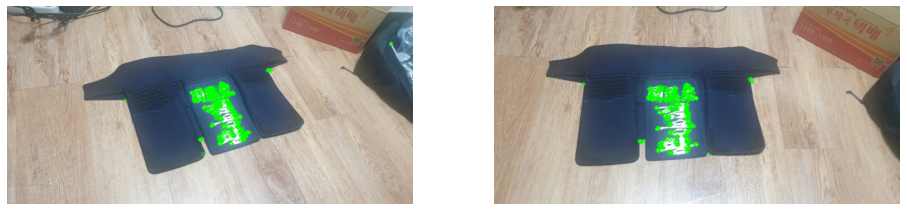

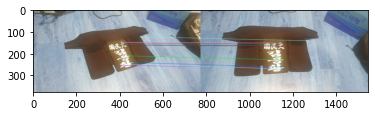

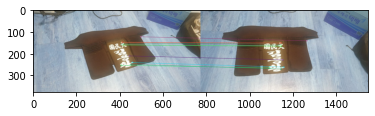

(<matplotlib.image.AxesImage at 0x7efd819005d0>, None)

In [105]:
img1 = cv.imread(ROOT + 'feature/tare1.JPG')
img2 = cv.imread(ROOT + 'feature/tare2.JPG')

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# To-do : 각 이미지에 대해 orb feature를 얻고 시각화하기
# ORB 검출기 시작
orb1 = cv.ORB_create ()
# ORB로 키포인트 찾기
kp1 = orb1.detect (img1, None )
# ORB로 설명자를 계산
kp1, des1 = orb1.compute (img1, kp1)
# 크기와 방향이 아닌 키포인트 위치 만 그립니다.
orb_kps_img1 = cv.drawKeypoints (img1, kp1, None , color = (0,255,0), flags = 0)
##
orb2 = cv.ORB_create ()
# ORB로 키포인트 찾기
kp2 = orb2.detect (img2, None )
# ORB로 설명자를 계산
kp2, des2 = orb.compute (img2, kp2)
# 크기와 방향이 아닌 키포인트 위치 만 그립니다.
orb_kps_img2 = cv.drawKeypoints (img2, kp2, None , color = (0,255,0), flags = 0)

#plt.imshow (img2), plt.show ()
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(orb_kps_img1[:,:,::-1])
plt.axis('off')
plt.subplot(122)
plt.imshow(orb_kps_img2[:,:,::-1])
plt.axis('off')
plt.show()
# BFMatcher 객체 생성
# create BFMatcher object
bf1 = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=False)
# Match descriptors.
matches = bf1.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

#circle consistency 
bf2 = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf2.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img4 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img4),plt.show()

## 추가 점수 과제

- opencv에서는`BFMathcer` 외의 다른 matcher를 제공한다. 이러한 다른 matcher를 이용해 같은 과정을 진행한다.
- 해당 matcher에 대해 간단히 조사해 보고, 각 과정에 대한 설명도 기술한다.

# To-do
FLANN(Fast Library for Approximate Nearest Neighbors Matching)
BFMatcher는 모든 디스크립터를 전수 조사하므로 이미지 사이즈가 클 경우 속도가 굉장히 느립니다. 이를 해결하기 위해 FLANN을 사용할 수 있습니다. FLANN은 모든 디스크립터를 전수 조사하기 보다 이웃하는 디스크립터끼리 비교를 합니다. 이웃하는 디스크립터를 찾기 위해 FLANN 알고리즘 함수에 인덱스 파라미터와 검색 파라미터를 전달해야 합니다.

OpenCV는 FLANN 객체 생성을 위한 함수로 cv2.FlannBasedMatcher()를 제공합니다. 이 함수는 인덱스 파라미터로 indexParams를 전달받고 검색 파라미터로 searchParams를 전달받습니다. 두 파라미터 모두 딕셔너리 형태입니다.

matcher = cv2.FlannBasedMatcher(indexParams, searchParams)

파라미터로 전달 받는 인덱스 파라미터와 검색 파라미터는 다음과 같은 값을 갖습니다.

indexParams: 인덱스 파라미터 (딕셔너리)

algorithm: 알고리즘 선택 키, 선택할 알고리즘에 따라 종속 키를 결정하면 됨
FLANN_INDEX_LINEAR=0: 선형 인덱싱, BFMatcher와 동일
FLANN_INDEX_KDTREE=1: KD-트리 인덱싱 (trees=4: 트리 개수(16을 권장))
FLANN_INDEX_KMEANS=2: K-평균 트리 인덱싱 (branching=32: 트리 분기 개수, iterations=11: 반복 횟수, centers_init=0: 초기 중심점 방식)
FLANN_INDEX_COMPOSITE=3: KD-트리, K-평균 혼합 인덱싱 (trees=4: 트리 개수, branching=32: 트리 분기 새수, iterations=11: 반복 횟수, centers_init=0: 초기 중심점 방식)
FLANN_INDEX_LSH=6: LSH 인덱싱 (table_number: 해시 테이블 수, key_size: 키 비트 크기, multi_probe_level: 인접 버킷 검색)
FLANN_INDEX_AUTOTUNED=255: 자동 인덱스 (target_precision=0.9: 검색 백분율, build_weight=0.01: 속도 우선순위, memory_weight=0.0: 메모리 우선순위, sample_fraction=0.1: 샘플 비율)
searchParams: 검색 파라미터 (딕셔너리)

searchParams: 검색 파라미터 (딕셔너리)
checks=32: 검색할 후보 수
eps=0.0: 사용 안 함
sorted=True: 정렬해서 반환
   

import cv2, numpy as np

img1 = cv2.imread('../img/taekwonv1.jpg')
img2 = cv2.imread('../img/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

 # 각 단계에 대한 설명
 
    # FLANNMatcher와 SIFT로 매칭 (match_flann_sift.py)

# SIFT 생성
detector = cv2.xfeatures2d.SIFT_create()
# 키 포인트와 서술자 추출
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

# 인덱스 파라미터와 검색 파라미터 설정 ---①
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

# Flann 매처 생성 ---③
matcher = cv2.FlannBasedMatcher(index_params, search_params)
# 매칭 계산 ---④
matches = matcher.match(desc1, desc2)
# 매칭 그리기
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2.imshow('Flann + SIFT', res)
cv2.waitKey()
cv2.destroyAllWindows()